In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split
from keras.models import Sequential
pd.pandas.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Final_Data_3_28.csv', parse_dates=True)
df.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,HOUR,DAY_OF_WEEK,MONTH,Zip,maxtempc,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex2,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,3/15/2018 10:50,Fairbanks,SB,14,0.47,0.40,2,9,10,5,3,21182,5,0,0,11.6,1,1,2,6:18 AM,5:11 PM,7:02 AM,6:57 PM,-3,1,4,1,12,6,64,0,1012,3,10,202,10
1,3/16/2018 14:31,Lake Shore Dr,SW,0,0.00,0.50,0,0,14,6,3,21192,1,-2,0,8.7,1,1,0,6:50 AM,6:12 PM,7:01 AM,6:58 PM,-8,-4,0,-4,15,98,52,0,1022,0,10,63,13
2,3/21/2018 0:40,Higgins,NW,0,0.00,2.47,0,0,0,4,3,4448,2,-1,0,10.3,1,1,27,9:28 AM,11:42 PM,6:52 AM,7:04 PM,-5,-6,0,-6,31,100,68,0,1014,0,10,38,23
3,3/20/2018 22:31,130th,EB,30,1.00,3.07,1,5,22,3,3,4460,1,-2,0,11.6,1,1,20,8:52 AM,10:33 PM,6:54 AM,7:03 PM,-5,-5,1,-5,33,100,66,0,1015,1,10,27,25
4,3/20/2018 4:20,Dr Martin L King Jr,NB,0,0.00,9.04,0,0,4,3,3,4301,1,-2,0,11.6,1,1,20,8:52 AM,10:33 PM,6:54 AM,7:03 PM,-6,-8,-1,-8,37,8,68,0,1014,-1,10,46,28


In [36]:
df['TIME'] = df['TIME'].astype('datetime64[ns]')

In [37]:
df['TIME']=pd.to_datetime(df['TIME'], format = '%d%b%Y:%H:%M:%S.%f')

In [38]:
df.columns

Index(['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length',
       'BUS_COUNT', 'MESSAGE_COUNT', 'HOUR', 'DAY_OF_WEEK', 'MONTH', 'Zip',
       'maxtempc', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex2', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [39]:
col_list = ['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length','BUS_COUNT',
            'MESSAGE_COUNT', 'Zip', 'WindGustKmph', 'visibility', 
           'WindGustKmph', 'visibility','totalSnow_cm', 'humidity']

In [40]:
df_p = df[col_list]
df_p.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,Zip,WindGustKmph,visibility,WindGustKmph,visibility,totalSnow_cm,humidity
0,2018-03-15 10:50:00,Fairbanks,SB,14,0.47,0.40,2,9,21182,12,10,12,10,0,64
1,2018-03-16 14:31:00,Lake Shore Dr,SW,0,0.00,0.50,0,0,21192,15,10,15,10,0,52
2,2018-03-21 00:40:00,Higgins,NW,0,0.00,2.47,0,0,4448,31,10,31,10,0,68
3,2018-03-20 22:31:00,130th,EB,30,1.00,3.07,1,5,4460,33,10,33,10,0,66
4,2018-03-20 04:20:00,Dr Martin L King Jr,NB,0,0.00,9.04,0,0,4301,37,10,37,10,0,68


In [41]:
df_p.shape

(123647, 15)

In [42]:
df_Fairbanks_SB= df_p[(df_p['STREET']=='Fairbanks') & (df_p['DIRECTION']=='SB')]
df_Fairbanks_SB.shape

(1001, 15)

In [47]:
df_Fairbanks_SB_day = df_Fairbanks_SB[df_Fairbanks_SB['TIME'].dt.day == 15]
df_Fairbanks_SB_day.shape

(143, 15)

In [49]:
df_Fairbanks_SB_day['TIME']=pd.to_datetime(df_Fairbanks_SB_day['TIME'], format = '%H:%M:%S')

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_Fairbanks_SB_day = df_Fairbanks_SB_day.sort_index()

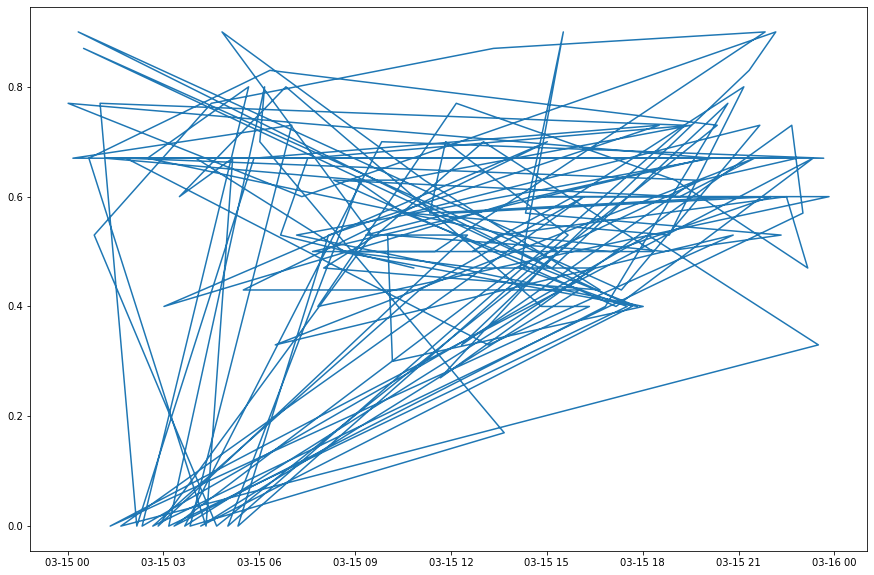

In [51]:
plt.figure(figsize = (15,10))
plt.plot(df_Fairbanks_SB_day['TIME'], df_Fairbanks_SB_day['Cong']);

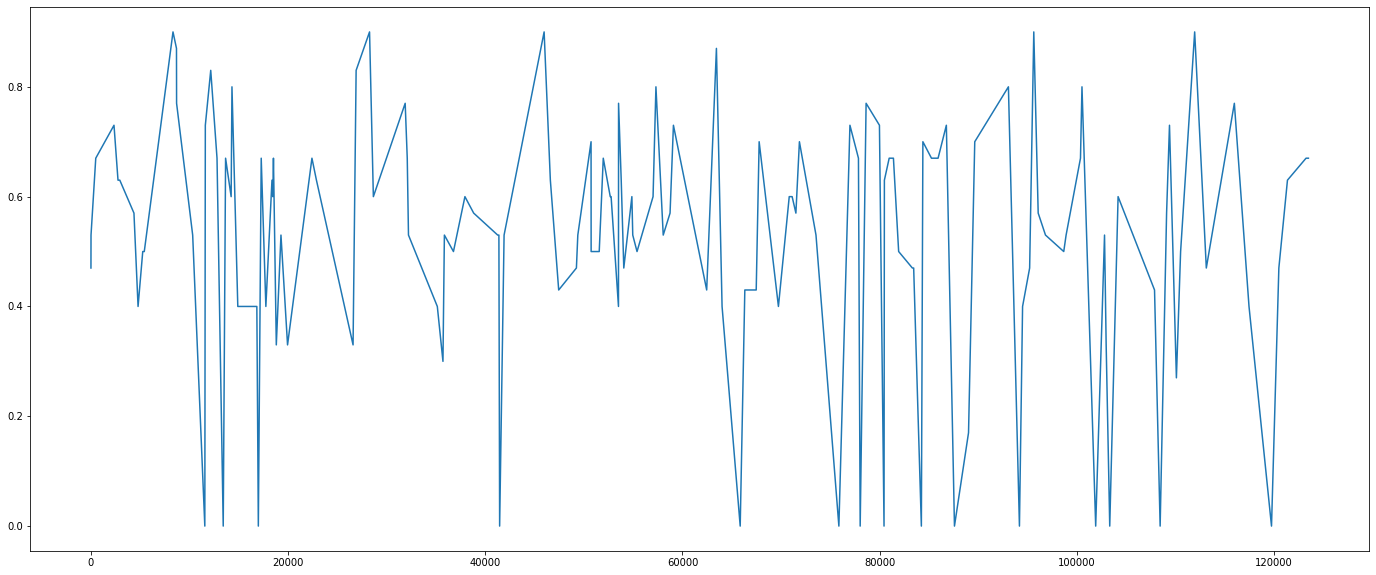

In [46]:
plt.figure(figsize = (24,10))
plt.plot(df_Fairbanks_SB_day.index, df_Fairbanks_SB_day['Cong'])

In [53]:
df_Fairbanks_SB_day['TIME']


0        2018-03-15 10:50:00
7        2018-03-15 06:40:00
488      2018-03-15 07:31:00
2338     2018-03-15 19:31:00
2744     2018-03-15 10:20:00
                 ...        
120488   2018-03-15 14:01:00
121361   2018-03-15 19:50:00
123245   2018-03-15 22:50:00
123305   2018-03-15 01:30:00
123485   2018-03-15 08:50:00
Name: TIME, Length: 143, dtype: datetime64[ns]

NameError: name 'col_list' is not defined